In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn import tree
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier
import os

In [2]:
os.chdir('C:\\Users\\DS1\\Downloads')
df=pd.read_csv('student_performance_new.csv')

In [3]:
df.head(2)

,Sl.No.,USN,STUDENT NAME,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result,Result
0,1,1RV21MC001,ABHISHEK M,34,39,14,29.0,1,4.0,6.0,10.0,16.0,1,45.0,14,13,1,1
1,2,1RV21MC006,AJITH KUMAR K,30,33,27,30.0,1,6.5,6.0,9.0,15.5,1,45.5,14,13,1,1


In [4]:
df.isnull().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          1
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [5]:
df.dropna(inplace=True)

In [6]:
df.isnull().sum()

Sl.No.                0
USN                   0
STUDENT NAME          0
Test I                0
Test II               0
Test III              0
Test Total            0
Test Result           0
Quiz 1                0
Quiz 2                0
Compensatory          0
Quiz                  0
Quiz Result           0
Test + Quiz           0
Assignment            0
Unnamed: 15           0
Assignment Result     0
Result                0
dtype: int64

In [7]:
X=df.iloc[3:17]
y=df['Result']

In [8]:
X=df.drop(columns=['Sl.No.','USN','STUDENT NAME','Result'],axis=1)

In [9]:
X.head(2)

,Test I,Test II,Test III,Test Total,Test Result,Quiz 1,Quiz 2,Compensatory,Quiz,Quiz Result,Test + Quiz,Assignment,Unnamed: 15,Assignment Result
0,34,39,14,29.0,1,4.0,6.0,10.0,16.0,1,45.0,14,13,1
1,30,33,27,30.0,1,6.5,6.0,9.0,15.5,1,45.5,14,13,1


In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [11]:
dtree=DecisionTreeClassifier(criterion="gini",random_state=1)

In [12]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(random_state=1)

In [13]:
y_pred=dtree.predict(X_test)

In [14]:
cm=confusion_matrix(y_test,y_pred)

<Axes: >

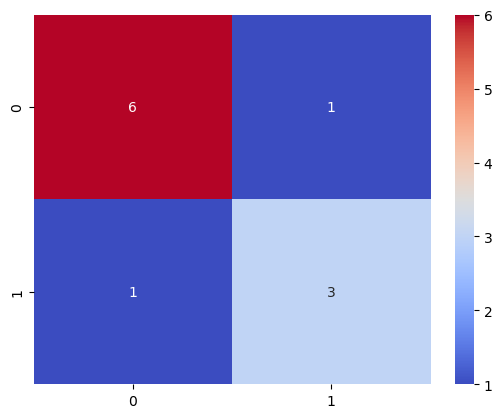

In [15]:
sns.heatmap(cm,annot=True,cmap="coolwarm")

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86         7
           1       0.75      0.75      0.75         4

    accuracy                           0.82        11
   macro avg       0.80      0.80      0.80        11
weighted avg       0.82      0.82      0.82        11



In [17]:
print(accuracy_score(y_test,y_pred))

0.8181818181818182


[Text(0.5, 0.9166666666666666, 'Test Total  <= 24.833\ngini = 0.499\nsamples = 42\nvalue = [20, 22]\nclass = fail'),
 Text(0.2, 0.75, 'Test III <= 16.5\ngini = 0.287\nsamples = 23\nvalue = [19, 4]\nclass = pass'),
 Text(0.1, 0.5833333333333334, 'gini = 0.0\nsamples = 12\nvalue = [12, 0]\nclass = pass'),
 Text(0.3, 0.5833333333333334, 'Test I  <= 19.5\ngini = 0.463\nsamples = 11\nvalue = [7, 4]\nclass = pass'),
 Text(0.2, 0.4166666666666667, 'Quiz <= 15.75\ngini = 0.219\nsamples = 8\nvalue = [7, 1]\nclass = pass'),
 Text(0.1, 0.25, 'gini = 0.0\nsamples = 6\nvalue = [6, 0]\nclass = pass'),
 Text(0.3, 0.25, 'Assignment  <= 13.5\ngini = 0.5\nsamples = 2\nvalue = [1, 1]\nclass = pass'),
 Text(0.2, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [0, 1]\nclass = fail'),
 Text(0.4, 0.08333333333333333, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]\nclass = pass'),
 Text(0.4, 0.4166666666666667, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = fail'),
 Text(0.8, 0.75, 'Quiz 2 <= 4.5\ngini = 

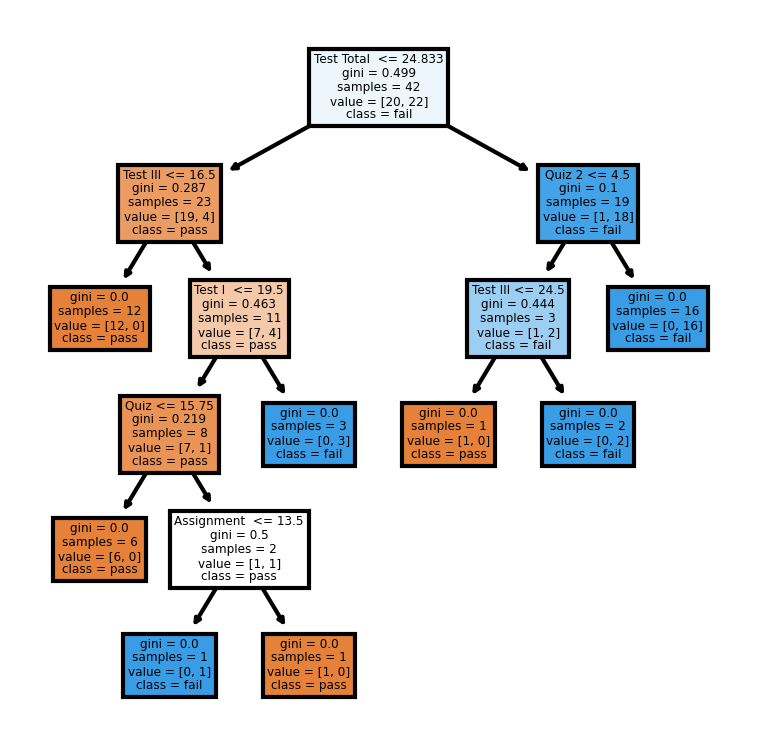

In [19]:
fn=X.columns.tolist()
cn=['pass','fail']
fig,axes=plt.subplots(nrows=1,ncols=1,figsize=(3,3),dpi=300)
tree.plot_tree(dtree,class_names=cn,feature_names=fn,filled=True)